In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

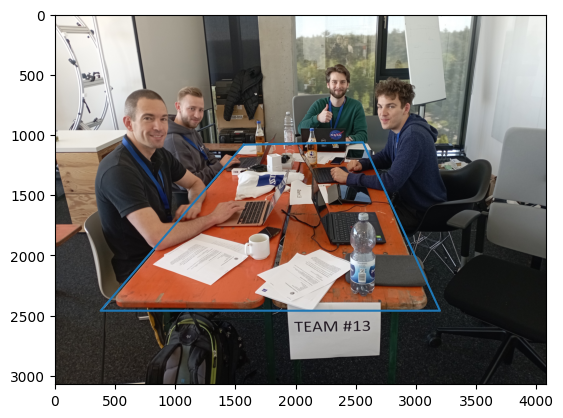

In [2]:
img = cv.imread('../images/IMG_20240427_135247.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
plt.imshow(img)
plt.plot([1570,380,3200,2560,1570],[1080,2460,2460,1060,1080]);

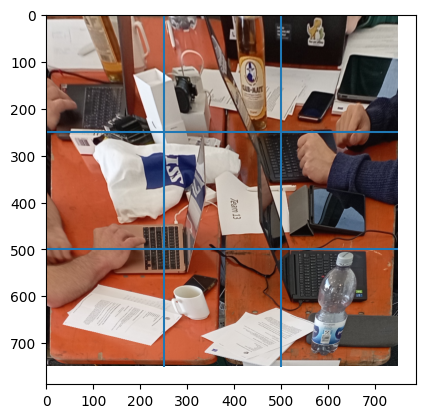

In [6]:
pts1 = np.float32([[1570, 1080],[2560,1060],[380,2460],[3200,2460]])
pts2 = np.float32([[0,0],[750,0],[0,750],[750,750]])
 
M = cv.getPerspectiveTransform(pts1,pts2)
 
img_warped = cv.warpPerspective(img,M,(750,750))
plt.imshow(img_warped)
plt.hlines([250, 500],0,750)
plt.vlines([250, 500],0,750)
plt.show()

In [4]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname('..'), '..'))
from scripts.transform_split import process_folder

process_folder('../images','../images')